# Assignment 2
This is due by 5pm on Friday 21st February. The mark breakdown is:

- Q0 [1 marks]
- Q1 [10 marks]
- Q2 [10 marks]
- Q3 [9 marks]

It is adviseable that you tidy up your notebook before submitting the final version. Also, remember to add comments to your code.

# Question 0

You should have saved this notebook to your ACM20030-Assignments folder. Now:
- commit the notebook to your local repository
- push the changes to the GitHub

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# The below commands make the font and image size bigger
plt.rcParams.update({'font.size': 22})
plt.rcParams["figure.figsize"] = (15,10)

# Question 1: Bisection method

### Q. 1a
Define a function for the quintic $f(x) = x^5+12 x^4-15 x^3-386 x^2-180 x+1800$ and plot it in the range $x=-11\dots6$

Text(0.5, 1.0, 'Graph of f(x)')

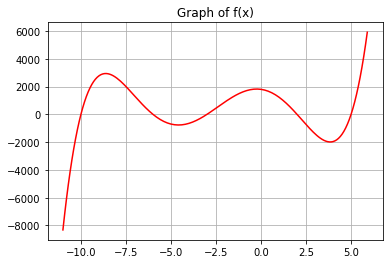

In [67]:
def f(x):
    ans = x**5 + 12*x**4 - 15*x**3 - 386*x**2 - 180*x + 1800
    return ans
x = np.arange(-11,6,.1)
plt.grid(True)
plt.plot(x,f(x),'r-')
plt.title("Graph of f(x)")


### Q. 1b
Using the plot, pick values of $a$ and $b$ such that $f(a) < 0$ and $f(b) > 0$ and the function has a **single** root in the region $(a,b)$. Assign variables called a and b to these values and print the values of $f(a)$ and $f(b)$.

In [19]:
a = -5
b = 1
print("f(a) = f(-5) =", f(-5), "and f(b) = f(1) =",f(1))

f(a) = f(-5) = -700 and f(b) = f(1) = 1232


Use the following FindRootBisection method to find the root to within a precision of $10^{-12}$

In [68]:
# This function only works when a < b and f(a) < 0 < f(b)
def FindRootBisection(f, a, b, tol, printSteps=False):
    left = a
    right = b
    while right-left > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            left = midpoint
        else:
            right = midpoint
        if(printSteps == True):
            print(midpoint)
    return midpoint

In [25]:
root = FindRootBisection(f,a,b,10**-12)
print("A root was found at x =", np.round(root, 12))

A root was found at x = -3.0


### Q. 1c
As the comment on the above FindRootBisection( ) function says it only works when $a<b$ and $f(a) < 0 < f(b)$. Create a new function that: 
 - **also** works when $f(a) > 0 > f(b)$. 
 - Checks that $\text{sign}(f(a)) \neq \text{sign}(f(b))$. If not the function should return "Cannot use bisection method as sign(f(a)) = sign(f(b)) ", where $a$ and $b$ have been replaced by their values
 
Call your new function FindRootBisectionImproved( ).  
Useful function: np.sign(x) will return sign(x)

Check your new function by:
 - finding the root between $x = 2.5$ and $x=6$
 - attempting to find a root between $x=6$ and $x=8$ (there is no root in this region)

In [62]:
def FindRootBisection(f, a, b, tol, printSteps=False):
    if a - b > 0:              ##comparing a and b
        left = a
        right = b
    elif a - b < 0:
        left = b
        right = a
    if np.sign(f(a)) == np.sign(f(b)):  ##comparing sing a and sign b
        print("Cannot use bisection method as sign(f("+str(a)+")) = sign(f("+str(b)+")) (The below answer is not a root)")
        return a
    while left - right > tol:
        midpoint = (left+right)/2
        if(f(midpoint) < 0):
            right = midpoint
        else:
            left = midpoint
        if(printSteps == True):
                print(midpoint)
    return midpoint
print(round(FindRootBisection(f, 2.5, 6, 10**-12),10))
print(FindRootBisection(f, 6, 8, 10**-12))


5.0
Cannot use bisection method as sign(f(6)) = sign(f(8)) (The below answer is not a root)
6


**Commit this question to your git repository and push the changes to GitHub**

## Question 2: Newton-Raphson method

### Q. 2a
 - Define a function $p(x) = \sinh^{-1} x$. Calculate its derivative and define it as $dp(x) = \dots$
 - Plot the function between $x=-11$ and $x=6$. Label the plot axes and use a grid.

Text(0, 0.5, 'arcsinh(x)')

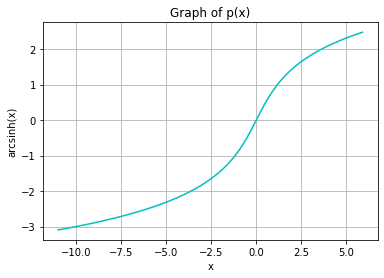

In [70]:
def p(x):
    p = np.arcsinh(x)
    return p
def dp(x):
    dp = 1/np.sqrt(x**2+1)
    return dp
x = np.arange(-11,6,.1)
plt.grid(True)
plt.plot(x,p(x),'c-')
plt.title("Graph of p(x)")
plt.xlabel("x")
plt.ylabel("arcsinh(x)")

### Q. 2b
 - Starting with a value near the root use the below Newton-Raphson code to find the root

In [87]:
def FindRootNewtonRaphson(f, df, x0, tol, printSteps=False):
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol and count < 20:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        count += 1
        if(printSteps):
            print("x_%d = %.14lf" % (count, x0))
    return x0

In [73]:
FindRootNewtonRaphson(p,dp,1,10**-12)

0.0

### Q. 2c
As we discussed in the lectures, the Newton-Raphson method (usually) converges quadradically if an initial guess is given that is sufficiently close to the root. If the guess is too far from the root the method can diverge. In this question we will find the critical value between converging and diverging where the method oscilliates with period 2.

If we define $F(x) = x - p(x)/p'(x)$, then a period-2 orbit will occur when $F(F(x)) = x$. In general this will be a complicated function so it might be very difficult to find the solution analytically. Instead, we can write this equation as $F(F(x)) - x = 0$, so the value of $x$ we want is the root.

- Define a function F(x)
- Define a function F2(x) which returns $F(F(x)) - x$
- Plot F2(x) with labels and a grid

Text(0, 0.5, 'F2(x)')

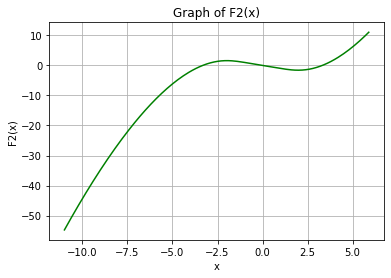

In [78]:
def F(x):
    ans = x - p(x)/dp(x)
    return ans
def F2(x):
    ans = F(F(x)) - x
    return ans
x = np.arange(-11,6,.1)
plt.plot(x,F2(x),'g-')
plt.grid(True)
plt.title("Graph of F2(x)")
plt.xlabel("x")
plt.ylabel("F2(x)")

- We want to find a root with $x \neq 0$. As we don't have easy access to the derivative of the function $F2(x)$ use the bisection method function from above to find a root of $F2(x)$ to a precision of $10^{-15}$. Use the plot from the previous part to bracket a root. **Assign** the vaue of the root of the variable 'x2' and also print(x2).
- Use the Newton-Raphson method with the function $p(x)$ and the initial guess x2. Set the final argument to True to print out the steps in the method takes. You should see that they oscillate between two values and the algorithm does not converge.

In [90]:
x2 = FindRootBisection(F2, .1, 10, 10**-15)
print(x2)
FindRootNewtonRaphson(p, dp, x2, 10**-15, True)


3.319826386395148
x_2 = -3.31982638639515
x_3 = 3.31982638639515
x_4 = -3.31982638639514
x_5 = 3.31982638639514
x_6 = -3.31982638639513
x_7 = 3.31982638639511
x_8 = -3.31982638639507
x_9 = 3.31982638639501
x_10 = -3.31982638639490
x_11 = 3.31982638639469
x_12 = -3.31982638639431
x_13 = 3.31982638639361
x_14 = -3.31982638639232
x_15 = 3.31982638638996
x_16 = -3.31982638638564
x_17 = 3.31982638637771
x_18 = -3.31982638636317
x_19 = 3.31982638633652
x_20 = -3.31982638628765


-3.3198263862876463

By slightly perturbing the initial guess we can get the method to converge or diverge. Try:
 - adding $10^{-3}$ to the initial guess. Does the method converge or diverge?
 - subtracting $10^{-3}$ from the initial guess. Does the method converge or diverge?
 
In both cases set the final argument to 'True' to get the function to print the steps the method is taking

In [93]:
print("Try x0 = x2+10^-3")
FindRootNewtonRaphson(p, dp, x2+10**-3, 10**-15, True)
print("This value of x0 diverges")
print("Try x0 = x2+10^-3")
FindRootNewtonRaphson(p, dp, x2-10**-3, 10**-15, True)
print("This value of x0 converges to 0")

Try x0 = x2+10^-3
x_2 = -3.32166017534519
x_3 = 3.32318941448714
x_4 = -3.32599474945762
x_5 = 3.33114299306826
x_6 = -3.34059743357328
x_7 = 3.35798209341778
x_8 = -3.39002330308560
x_9 = 3.44932929068383
x_10 = -3.55995186656866
x_11 = 3.76918950842467
x_12 = -4.17488530024739
x_13 = 4.99611226214762
x_14 = -6.78235424034431
x_15 = 11.13059074590426
x_16 = -23.56748729013745
x_17 = 67.33071923384574
x_18 = -262.81601050143900
x_19 = 1383.63440311495151
x_20 = -9582.52377424232873
This value of x0 diverges
Try x0 = x2+10^-3
x_2 = -3.31799291955419
x_3 = 3.31646503192368
x_4 = -3.31366473335724
x_5 = 3.30853432591227
x_6 = -3.29914150942781
x_7 = 3.28196707676460
x_8 = -3.25063825727736
x_9 = 3.19373767283546
x_10 = -3.09122130707522
x_11 = 2.90927347399593
x_12 = -2.59540431535248
x_13 = 2.08314783302489
x_14 = -1.33723662270818
x_15 = 0.50112317029151
x_16 = -0.03825335712818
x_17 = 0.00001864804651
x_18 = -0.00000000000000
x_19 = 0.00000000000000
x_20 = 0.00000000000000
This value o

**Commit this question to your git repository and push the changes to GitHub**

## Question 3: Slow convergence of the Newton-Raphson method at repeated roots
The Newton-Raphson method usual converges quadratically but it will converge more slowly at repeated roots. In this question we will look at an example of this.

Define the function $g(x) = (x-2)^2(x+1)$, and also define its derivative $g'(x)$. Plot the function from $x=-2\dots3$

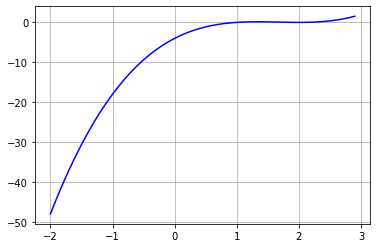

In [108]:
def g(x):
    ans = ((x-2)**2)*(x-1)
    return ans
def dg(x):
    ans = (x-2)*(3*x-4)
    return ans
x = np.arange(-2,3,.1)
plt.grid(True)
plt.plot(x,g(x),'b-')

Run the FindRootNewtonRaphson function with the final (optional) argument set to True to see the steps the algorithm takes. Run it with:
 - the initial value of $x_0 = 3$
 - the initial value of $x_0 = -2$

In [105]:
print("x0 = 3, root =", FindRootNewtonRaphson(g, dg, 3, 10**-12, True))
print("x0 = -2, root =", FindRootNewtonRaphson(g, dg, -2, 10**-12, True))
print("It takes nearly twice as many iterations for the function to converge around 2 than 1")

x_2 = 2.60000000000000
x_3 = 2.34736842105263
x_4 = 2.19351666363140
x_5 = 2.10401428485578
x_6 = 2.05434684202141
x_7 = 2.02785615885175
x_8 = 2.01411429014914
x_9 = 2.00710591582440
x_10 = 2.00356544828878
x_11 = 2.00178588534313
x_12 = 2.00089373788793
x_13 = 2.00044706836847
x_14 = 2.00022358411828
x_15 = 2.00011180455241
x_16 = 2.00005590540075
x_17 = 2.00002795348166
x_18 = 2.00001397693617
x_19 = 2.00000698851692
x_20 = 2.00000349427067
x0 = 3, root = 2.0000034942706715
x_2 = -0.80000000000000
x_3 = -0.01250000000000
x_4 = 0.49218266253870
x_5 = 0.79561454154013
x_6 = 0.94820909334345
x_7 = 0.99535682647522
x_8 = 0.99995747424265
x_9 = 0.99999999638358
x_10 = 1.00000000000000
x_11 = 1.00000000000000
x0 = -2, root = 1.0


What do you notice about the convergence rates in these two cases? Let's examine it more carefully. The function below returns the individual steps of the Newton-Raphson algorithm.

In [110]:
def FindRootNewtonRaphsonSteps(f, df, x0, tol):
    steps = np.array([x0])
    f0 = f(x0)
    count = 1
    while np.abs(f0) > tol:
        f0 = f(x0)
        x0 = x0 - f0/df(x0)
        steps = np.append(steps, x0)
        count += 1
    return steps

Using the above function:
- compute the steps for the function $g(x)$ with  $x_0 = 3$. Assign the result to a variable.
- compute the steps for the function $g(x)$ with  $x_0 = -2$. Assign the result to a different variable.

In [123]:
steps2 = FindRootNewtonRaphsonSteps(g, dg, 3, 10**-12)
steps1 = FindRootNewtonRaphsonSteps(g, dg, -2, 10**-12)
print("x0 = 3, steps =", steps2)
print("x0 = -2, steps =", steps1)

x0 = 3, steps = [3.         2.6        2.34736842 2.19351666 2.10401428 2.05434684
 2.02785616 2.01411429 2.00710592 2.00356545 2.00178589 2.00089374
 2.00044707 2.00022358 2.0001118  2.00005591 2.00002795 2.00001398
 2.00000699 2.00000349 2.00000175 2.00000087 2.00000044]
x0 = -2, steps = [-2.         -0.8        -0.0125      0.49218266  0.79561454  0.94820909
  0.99535683  0.99995747  1.          1.          1.        ]


Plot the absolute difference between the steps and the root, i.e., $|x_n - x_*|$, on a log scale.

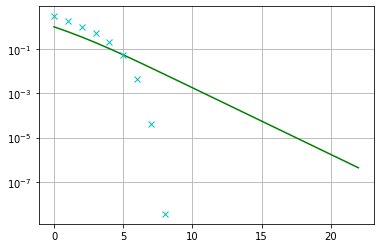

In [131]:
def difference(x, root):
    return abs(root-x)
plt.yscale("log")
plt.grid(True)
plt.ylabel("log")
root = 2
x = np.arange(0,np.size(steps2),1)
plt.plot(x,difference(steps2[x],root),'g-')
root = 1
x = np.arange(0,np.size(steps1),1)
plt.plot(x,difference(steps1[x],root),'cx')


You should find the difference for the repeated root looks linear on the log-scale, which is the same as we saw for the bisection method. This (correctly) suggests that for repeated roots the Newton-Raphson converges linearly (rather than quadratically)

**Commit this question to your git repository and push the changes to GitHub**

## Submitting the assignment

Submit the assignment the same way you did with the first one.

To submit your assignment you should zip the ACM20030-Assignments folder. Rename the zip file ACM20030-Assignments2-STUDENTNUMBER.zip where STUDENTNUMBER is your student number. Upload the zip file to BrightSpace.